# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: `Zeynab Mottaqi`
2.   Student Number: `99206203`


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [69]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [436]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
split_ratio = 250
x_train = dataset['X'][:split_ratio].to_numpy().reshape(1,-1)
y_train = dataset['Y'][:split_ratio].to_numpy().reshape(1,-1)

x_test = dataset['X'][split_ratio:].to_numpy().reshape(1,-1)
y_test = dataset['Y'][split_ratio:].to_numpy().reshape(1,-1)
    


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [437]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A_T = np.linalg.pinv(x_train @ x_train.T)
A_T_y = x_train @ y_train.T

m = A_T @ A_T_y
m = np.concatenate((m.reshape(1,),[0.0]))

In [438]:
predicted_train_y = m[0] * x_train.T + m[1]
predicted_test_y = m[0] * x_test.T + m[1]

train_error = mean_squared_error(predicted_train_y,y_train.T)
test_error = mean_squared_error(predicted_test_y,y_test.T)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.4974500778765652
MSE test error: 0.502907941059912


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

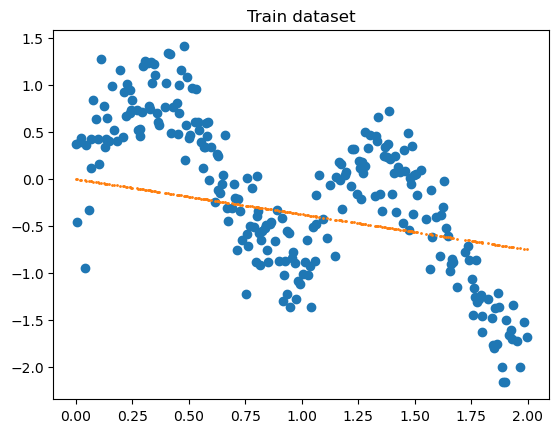

In [439]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

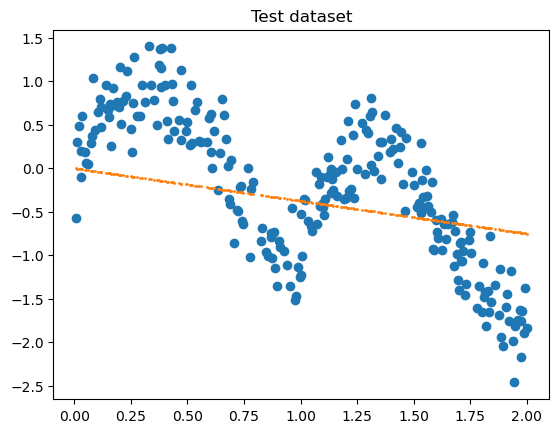

In [440]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

- Since linear line is not a good representative indicate for a nonlinear data, with a lot of error, we accept it.
- This slope and the intercept should update a bit in order to achieve a better accuarcy(`not much`)
- No, not at all
- The main problem is the nonlinearity of the dataset, therefore, other methods(`nonlinear`) should be used instead.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

- Locally weighted linear regression is a non-parametric algorithm, that is, the model does not learn a fixed set of parameters as is done in ordinary linear regression.
- Hence, It is definitely a better approach than the classic linear regression!

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [441]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-(np.sum(np.power(train_dataset - the_query_point,2)))/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [442]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    tmp = X.T * W
    tmp2 = np.linalg.pinv(tmp.T @ X.T)
    tmp3 = tmp2 @ tmp.T
    theta =  tmp3.T @ train_Y

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [443]:

predicted_test = [predict(x_train.T, y_train.T\
                          , query, 10) for query in x_test[0,:]]
predicted_test = np.array(predicted_test).reshape((y_test.shape[1],1))
error = mean_squared_error(predicted_test,y_test.T)
print(f"MSE test error: {error}")

MSE test error: 0.3261610863644883


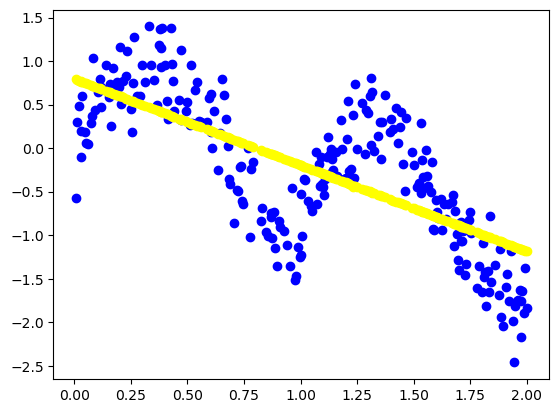

In [444]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

- Yes, bcs the parameters have been updated in some iterations, thus, the loss value has become less and less but not less than a specific value.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

- Since KNN approach devides the dataset in to N neighbours, so it has this capability of getting more accurate information from the dataset.

### Part10:
Implementing the `KNN model`.

In [445]:
from collections import defaultdict
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
    
    
    def distance(self, x1, x2):
        # implement the distance function
        return np.sqrt(np.sum((x1 - x2)**2, axis=1))

    def return_nn_ids(self, x):
        # find indices of k nearest neighbours to x
        indices = []
        counts = defaultdict(int)
        for t in x:
            counts[t] += 1
        maxC = max(counts.values())
        for t1,t2 in counts.items():
            if t2 == maxC:
                indices.append(t1)
        return indices

    def predict(self, x):
        predicted_y = []
        for t in x:
            labels = []
            for t1,t2 in zip(self.X,self.Y):
                labels.append((np.linalg.norm(t-t1),t2))
            labels.sort(key=lambda Ell: Ell[0])
            labels = labels[:self.k]
            predicted_y.append(self.return_nn_ids([ell for _, ell in labels]))
    
        
        return np.array(predicted_y)

In [484]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train[0,:], y_train[0,:])
    predicted_y = model.predict(x_test[0,:])
    error = mean_squared_error(predicted_y[:,1],y_test[0,:])
    return error, predicted_y

In [500]:
k = 10
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.1750146715781829


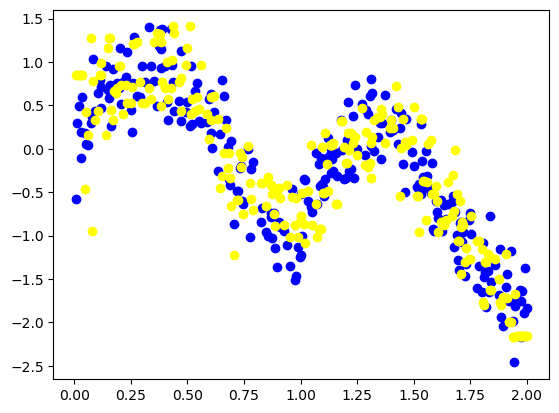

In [501]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y[:,-1], c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

- Using the cross validation the best K value can be found (so called the camel neck of the K values) which gives almost the best and almost fast inference result.
- Maybe a higher 11-NN could achieve a better accuracy.